# **Predviđanje visine godišnjih primanja na temelju popisnih podataka**

## Eksploratorna analiza

U ovom dokumentu provest će se eksploratorna analiza skupa podataka koje koristimo u našem projektnom zadatku iz kolegija Strojno učenje.

Tema našeg projekta je predviđanje visine godišnjih prihoda na temelju popisnih podataka. Podaci koje ćemo koristiti dolaze iz tzv. Adult Dataset-a. Adult Dataset ili Income Census Dataset je skup podataka u kojem se uz demografske i ekonomske karakteristike pojedinca nalazi i podatak o prihodima. Ispitanici su podijeljeni s obzirom na visinu godišnjih prihoda u američkim dolarima. Prva skupina je ona koja ima godišnje prihode manje od 50 000 dolara, dok je druga ona čiji su prihodi viši od tog iznosa.

Podaci su prikupljeni 1994. godine iz popisne baze podataka (Census database) i postoji više istraživanja i radova iz strojnog učenja na tu temu. Naš tim pokušat će sa istim tim podacima koristeći razne algoritme i metode strojnog učenja što točnije predvidjeti koje osobe zarađuju više od 50 000 dolara godišnje, a koje manje od tog iznosa.

### Skup podataka

Skup podataka sastoji se od 48 842 instance koje predstavljaju različite ispitane osobe na popisu stanovništva te 14 demografskih i ekonomskih atributa. Podaci su podijeljeni u dva skupa podataka, train data (u kojem se nalazi 32 561 instanca) te test data (u kojem se nalazi 16 281 insatnca podataka). Skup podataka i informacije o problemu dostupne su na sljedećem linku: [UCI Machine Learning Repository](http://archive.ics.uci.edu/ml/datasets/adult). Također skupovi podataka su dostupni na Kaggle-u pod imenima : [Adult Income Dataset Kaggle](https://www.kaggle.com/wenruliu/adult-income-dataset) i [Adult Census Income Dataset Kaggle](https://www.kaggle.com/uciml/adult-census-income) 

Popis atributa:
* Age: dob ispitanika, numerička varijabla
* Workclass: radni sektor, kategorijska varijabla (8 kategorija)
* fnlwgt: *final weight*, koristi se u anketama, ispitanici sa sličnim fnlwgt-om imaju slična demografska svojstva, više informacija može se naći na stranici Kaggle-a: https://www.kaggle.com/uciml/adult-census-income, numerička varijabla
* Education: najviši potignuti stupanj obrazovanja ispitanika, kategorijska varijabla (16 kategorija)
* Education-num: brojčana oznaka najvišeg postignutog stupnja obrazovanja ispitanika, numerička varijabla
* Marital-status: bračno stanje ispitanika, kategorijska varijabla (7 kategorija)
* Occupation: zanimanje ispitanika, kategorijska varijabla (14 kategorija)
* Relationship: položaj u obitelji ispitanika, kategorijska varijabla (6 kategorija)
* Race: rasa ispitanika, kategorijska varijabla (5 kategorija)
* Sex: spol ispitanika, kategorijska varijabla (2 kategorije)
* Capital-gain: prihod proizašao od investicija, numerička varijabla
* Capital-loss: gubitak priozašao od investicija, numerička varijabla
* Hours-per-week: broj radnih sati tjedno, numerička varijabla
* Native-country: država rođenja, kategorijska varijabla (41 kategorija)
* Income: podatak koji predivđamo (**Target**), zarađuje li ispitanik više ili manje od 50 000 američkih dolara tjedno, kategorijska varijabla (2 kategorije)

### Analiza

Učitavamo podatke u Pandas Dataframe te ispisujemo podatke korisne u analizi. Učitavamo datoteku u kojoj su zajedno prikazani test i train podaci. Također, postoje datoteke train.data i test.data u kojem je skup podataka podijeljen na skup za treniranje i testiranje te ćemo ih tako i mi koristiti. U eksploratornoj analizi koristit ćemo datoteku sa svim instancama kako bismo bolje prikazali skup podataka. Prikazujemo maksimalne, minimalne podatke, uređujemo nazive. Tražimo ima li podataka bez vrijednosti.

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import sklearn.preprocessing as preprocessing

%matplotlib inline

In [2]:
data = pd.read_csv('adult.csv')

In [3]:
data.head()

,Age,Workclass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [4]:
print(data.shape)

(48842, 15)


In [5]:
print(data.columns)

Index(['Age', 'Workclass', 'fnlwgt', 'Education', 'Education-num',
       'Marital-status', 'Occupation', 'Relationship', 'Race', 'Sex',
       'Capital-gain', 'Capital-loss', 'Hours-per-week', 'Native-country',
       'Income'],
      dtype='object')


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
Age               48842 non-null int64
Workclass         48842 non-null object
fnlwgt            48842 non-null int64
Education         48842 non-null object
Education-num     48842 non-null int64
Marital-status    48842 non-null object
Occupation        48842 non-null object
Relationship      48842 non-null object
Race              48842 non-null object
Sex               48842 non-null object
Capital-gain      48842 non-null int64
Capital-loss      48842 non-null int64
Hours-per-week    48842 non-null int64
Native-country    48842 non-null object
Income            48842 non-null object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB


Sa data.describe() dobivamo statističke vrijednosti koje su nam korisne u prikazu distribucije podataka.

In [7]:
data.describe()

,Age,fnlwgt,Education-num,Capital-gain,Capital-loss,Hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


Iz ispisanih podataka primjećujemo da većina vrijednosti Capital-gain i Capital-loss iznosi 0.0. To je rezultat činjenice da većina ljudi ne investira novac. Ta dva svojstva ćemo vjerojatno trebati nekako drugačije prikazati, više ćemo o tome kasnije.

U skupu podataka postoje i podaci bez vrijednosti (označeni su sa ?):

In [8]:
printseries = pd.DataFrame(columns=['Atribut', 'Occurance'])
j = 0
for i in range(1,np.size(data.columns)):
    if not np.issubdtype(data.iloc[:,i],np.number):
        printseries.loc[j] = [data.columns.values[i],data[data.iloc[:,i] == '?'].shape[0]]
        j = j + 1
printseries

,Atribut,Occurance
0,Workclass,2799
1,Education,0
2,Marital-status,0
3,Occupation,2809
4,Relationship,0
5,Race,0
6,Sex,0
7,Native-country,857
8,Income,0


U sljedećim fazama rješavanja problema trebat ćemo zamijeniti te nepoznate vrijednosti (označene sa '?'). Jedna od mogućnosti je da '?' zamijenimo vrijednošću 'Unknown' obzirom da se u popisnim podacima neispunjene vrijednosti tako označavaju. Ispitanici ponekad s razlogom ne ispune određeno pitanje u popisnom obrascu tako da bi možda, ako sve takve vrijednosti grupiramo u jednu kategoriju, mogli od toga imati koristi u rješavanju problema.

Mogli smo primjetiti kako vrijednosti atributa 'Income' koji želimo predivdjeti iznose '<=50K' i '>50K'. Binarni klasifikator zahtijeva numeričke vrijednosti tako da ćemo vrijednosti tog atributa promijeniti. Preslikavamo '<=50K' u 0, a '>50K' u 1. Kasnije ćemo slično učiniti i s preostalim atributima kategorijskih vrijednosti kako bi naši algoritmi i metode strojnog učenja mogle ispravno raditi s numeričkim podacima. Zasad to još ne radimo jer će grafovi koje iscrtavamo biti više informativni s pravim atributima.

In [9]:
mapa = {'<=50K' : 0, '>50K' : 1}
data = data.replace({'Income' : mapa})
data

,Age,Workclass,fnlwgt,Education,Education-num,Marital-status,Occupation,Relationship,Race,Sex,Capital-gain,Capital-loss,Hours-per-week,Native-country,Income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,1
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,1
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,0
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,0
6,29,?,227026,HS-grad,9,Never-married,?,Unmarried,Black,Male,0,0,40,United-States,0
7,63,Self-emp-not-inc,104626,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,3103,0,32,United-States,1
8,24,Private,369667,Some-college,10,Never-married,Other-service,Unmarried,White,Female,0,0,40,United-States,0
9,55,Private,104996,7th-8th,4,Married-civ-spouse,Craft-repair,Husband,White,Male,0,0,10,United-States,0


Nadalje u analizi osobe čiji su prihodi manji od 50 000 dolara imaju vrijednost atributa 'Income' nula, dok one koje imaju prihode veće od tog iznosa imaju vrijednost jedan.

U skupu podataka se nalazi oko 75% ispitanika čiji su prihodi manji od 50 000 dolara godišnje te oko 25% onih čiji su prihodi veći. To nam sugerira da kategorije u koje trebamo klasificirati podatke nisu sasvim jednake veličine, ali i dalje razlika nije prevelika pa možemo koristiti preciznost (accuracy) za evaluaciju rješenja naših modela.

In [10]:
print(data['Income'].value_counts(), '\n', data['Income'].value_counts(normalize=1))

0    37155
1    11687
Name: Income, dtype: int64 
 0    0.760718
1    0.239282
Name: Income, dtype: float64


Grupirajući vrijednosti po visini godišnjih prihoda možemo ispisati određene statističke vrijednosti koje mogu biti od koristi:

In [11]:
columns = ['Age', 'Education-num']
data.groupby(['Income'])[columns].describe()

Age                                                      \
          count       mean        std   min   25%   50%   75%   max   
Income                                                                
0       37155.0  36.872184  14.104118  17.0  25.0  34.0  46.0  90.0   
1       11687.0  44.275178  10.558983  19.0  36.0  43.0  51.0  90.0   

       Education-num                                                    
               count       mean       std  min   25%   50%   75%   max  
Income                                                                  
0            37155.0   9.598493  2.437673  1.0   9.0   9.0  10.0  16.0  
1            11687.0  11.602807  2.382624  1.0  10.0  12.0  13.0  16.0

In [12]:
columns = ['Hours-per-week']
data.groupby(['Income'])[columns].describe()

Hours-per-week                                                   
                count       mean        std  min   25%   50%   75%   max
Income                                                                  
0             37155.0  38.840048  12.356849  1.0  35.0  40.0  40.0  99.0
1             11687.0  45.452896  11.091176  1.0  40.0  40.0  50.0  99.0

In [13]:
columns = ['Capital-gain', 'Capital-loss']
data.groupby(['Income'])[columns].describe() 

Capital-gain                                                          \
              count         mean           std  min  25%  50%  75%      max   
Income                                                                        
0           37155.0   147.010308    936.753678  0.0  0.0  0.0  0.0  41310.0   
1           11687.0  4042.239497  14756.771034  0.0  0.0  0.0  0.0  99999.0   

       Capital-loss                                                      
              count        mean         std  min  25%  50%  75%     max  
Income                                                                   
0           37155.0   54.151931  313.320005  0.0  0.0  0.0  0.0  4356.0  
1           11687.0  193.528964  593.211612  0.0  0.0  0.0  0.0  3683.0

Pogledajmo utječu li određeni atributi na visinu prihoda.

In [14]:
pd.crosstab(data['Income'], data['Sex'])

Sex,Female,Male
Income,,
0,14423,22732
1,1769,9918


In [15]:
pd.crosstab(data['Income'], data['Sex'], normalize=1)

Sex,Female,Male
Income,,
0,0.890749,0.696233
1,0.109251,0.303767


In [16]:
pd.crosstab(data['Income'], data['Race'])

Race,Amer-Indian-Eskimo,Asian-Pac-Islander,Black,Other,White
Income,,,,,
0,415,1110,4119,356,31155
1,55,409,566,50,10607


In [17]:
data.groupby(['Race'])['Income'].agg([np.mean]).sort_values(by='mean', ascending=False).T

Race,Asian-Pac-Islander,White,Other,Black,Amer-Indian-Eskimo
mean,0.269256,0.253987,0.123153,0.120811,0.117021


S obzirom na rasu ispitanika, među osobama rase White ili Asian udio onih koji pripadaju kategoriji s većim prihodima je oko 25%, dok je za ostale značajnije niže, oko 10%.

In [18]:
pd.crosstab(data['Income'], data['Education'])

Education,10th,11th,12th,1st-4th,5th-6th,7th-8th,9th,Assoc-acdm,Assoc-voc,Bachelors,Doctorate,HS-grad,Masters,Preschool,Prof-school,Some-college
Income,,,,,,,,,,,,,,,,
0,1302,1720,609,239,482,893,715,1188,1539,4712,163,13281,1198,82,217,8815
1,87,92,48,8,27,62,41,413,522,3313,431,2503,1459,1,617,2063


In [19]:
data.groupby(['Education'])['Income'].agg([np.mean]).sort_values(by='mean', ascending=False).T

Education,Prof-school,Doctorate,Masters,Bachelors,Assoc-acdm,Assoc-voc,Some-college,HS-grad,12th,7th-8th,10th,9th,5th-6th,11th,1st-4th,Preschool
mean,0.739808,0.725589,0.549116,0.412835,0.257964,0.253275,0.189649,0.158578,0.073059,0.064921,0.062635,0.054233,0.053045,0.050773,0.032389,0.012048


Također, možemo primjetiti da stupanj obrazovanja uvelike utječe kojoj skupini ispitanici pripadaju. Udio osoba koje pripadaju u kategoriju s većim prihodima kreće se u rasponu od 0.0 do 0.74092 te porastom stupnja obrazovanja raste i njihov udio. Među osobama koje imaju visokoškolski stupanj obrazovanja, udio onih koji pripadaju kategoriji s većim prihodima je veći nego među ostalima.

In [20]:
pd.crosstab(data['Income'], data['Marital-status'])
data.groupby(['Marital-status'])['Income'].agg([np.mean]).sort_values(by='mean', ascending=False).T

Marital-status,Married-civ-spouse,Married-AF-spouse,Divorced,Married-spouse-absent,Widowed,Separated,Never-married
mean,0.446133,0.378378,0.101161,0.092357,0.084321,0.064706,0.04548


Bračno stanje se nameće kao još jedan atribut koji bi mogao biti koristan u klasifikaciji prihoda. Udio osoba u braku koje pripadaju kategoriji s većim prihodima iznosi približno 44%, dok za neoženjene/neudane, rastavljenje i s preminulim supružnikom iznosi 10% ili manje.

### Grafička analiza

U sljedećem odjeljku analizirat ćemo podatke koristeći grafove iz Python paketa koji služe za vizualizaciju bazirajući se na seaborn i matplotlib.

Za početak, iscrtajmo histograme atributa numeričkih vrijednosti iz našeg skupa podataka.

In [21]:
sns.set()

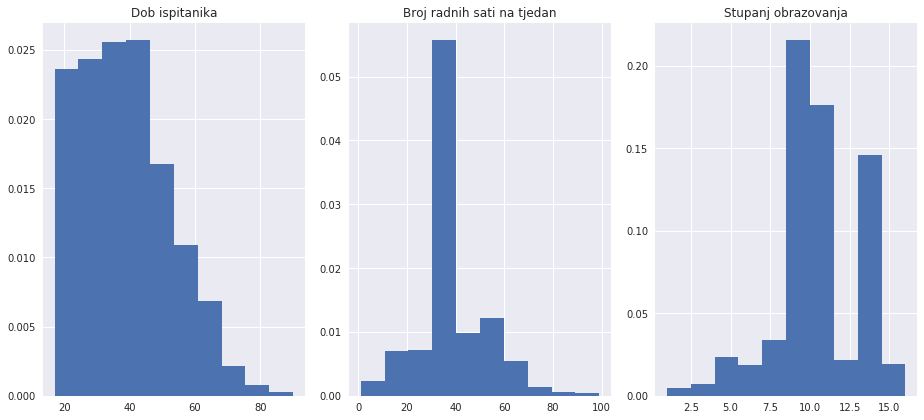

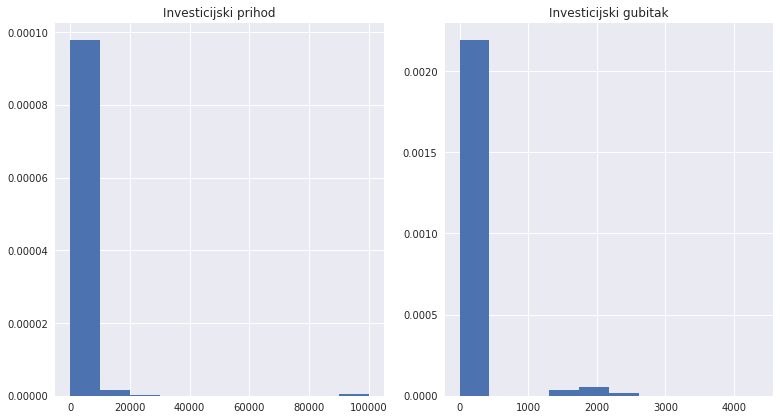

In [22]:
fig,axes = plt.subplots(1,3, figsize = (13,6))
n, bins, patches = axes[0].hist(x = data['Age'], density = 1)
axes[0].set_title('Dob ispitanika')
n, bins, patches = axes[1].hist(x = data['Hours-per-week'], density = 1)
axes[1].set_title('Broj radnih sati na tjedan')
n, bins, patches = axes[2].hist(x = data['Education-num'], density = 1)
axes[2].set_title('Stupanj obrazovanja')

fig.tight_layout()

fig,axes = plt.subplots(1,2, figsize = (11,6))
n, bins, patches = axes[0].hist(x = data['Capital-gain'], density = 1)
axes[0].set_title('Investicijski prihod')
n, bins, patches = axes[1].hist(x = data['Capital-loss'], density = 1)
axes[1].set_title('Investicijski gubitak')

fig.tight_layout()

Bar plotovima možemo prikazati i ostala, nenumerička svojstva:

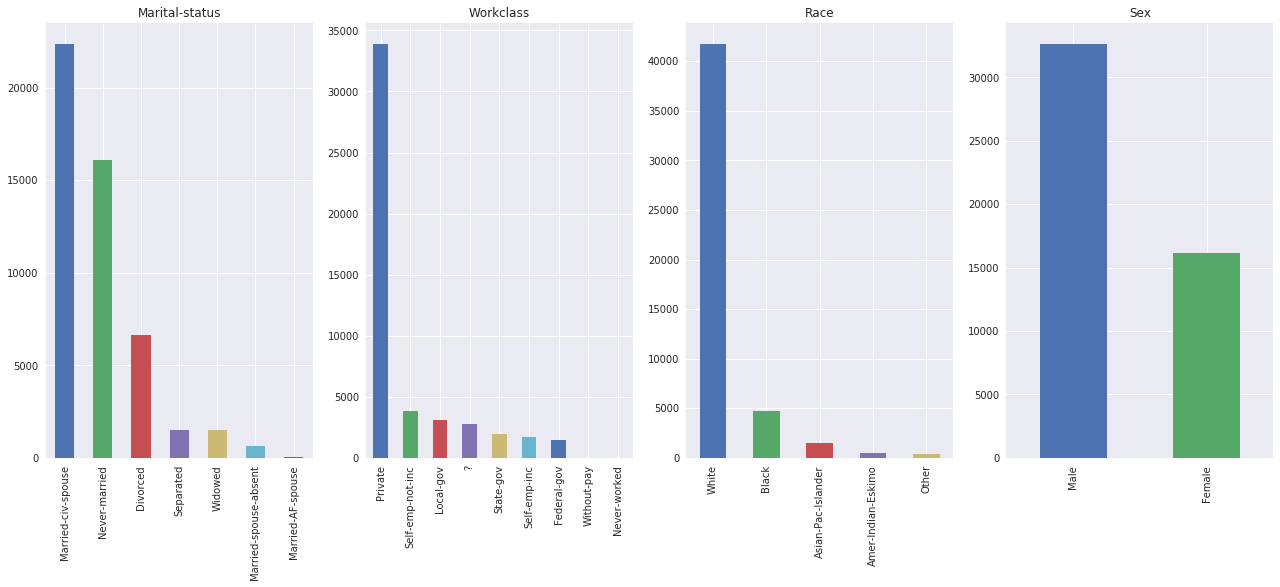

In [23]:
fig = plt.figure(figsize = (22,8))
names = ['Marital-status','Workclass','Race','Sex']
for i,name in enumerate(names):
    ax = fig.add_subplot(1, 4, i + 1)
    data[name].value_counts().plot(kind="bar", axes=ax)
    ax.set_title(name)

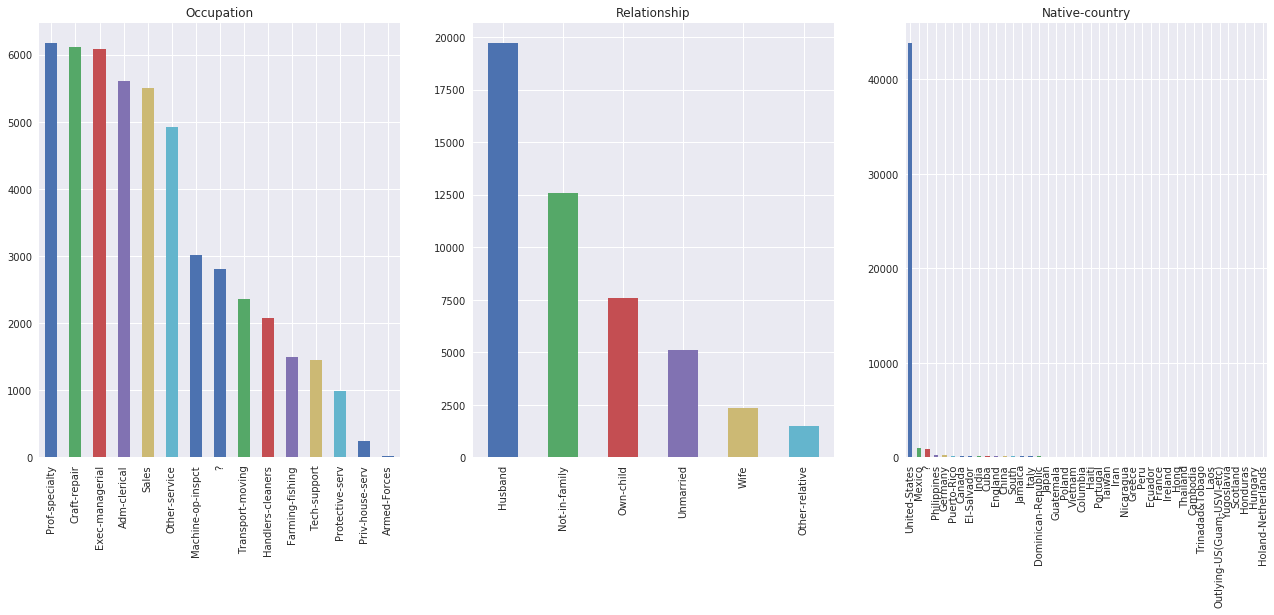

In [24]:
fig = plt.figure(figsize = (22,8))
names = ['Occupation','Relationship','Native-country']
for i,name in enumerate(names):
    ax = fig.add_subplot(1, 3, i + 1)
    data[name].value_counts().plot(kind="bar", axes=ax)
    ax.set_title(name)

Primjećujemo da se određene vrijednosti nekih svojstva javljaju češće od ostalih: 'White' u svojstvu 'Rasa', 'Private' u 'Workclass', 'Male' u 'Sex', ...

Prikažimo prije ispisane podatke u cross tablicama.

Možemo uspoređivati jesu li prihodi manji ili veći od 50 000 dolara obzirom na radni sektor, rasu ili položaj u obitelji.

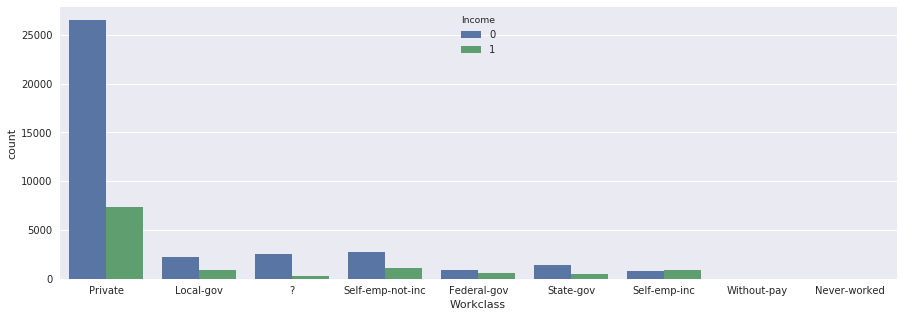

In [25]:
fig,ax = plt.subplots(1,figsize=(15,5))
sns.countplot(x='Workclass', hue='Income', data=data);

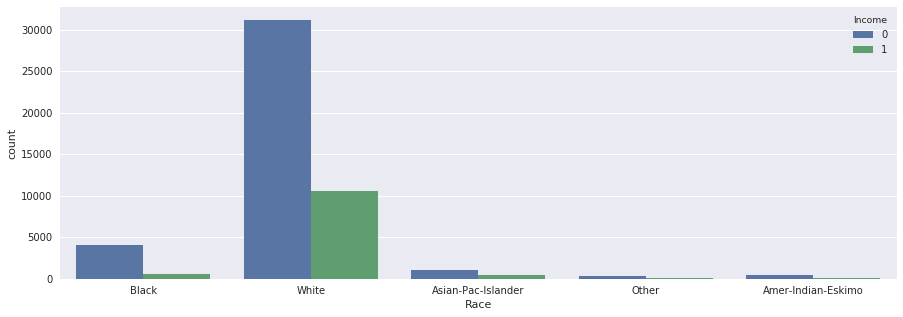

In [26]:
fig,ax = plt.subplots(1,figsize=(15,5))
sns.countplot(x='Race', hue='Income', data=data);

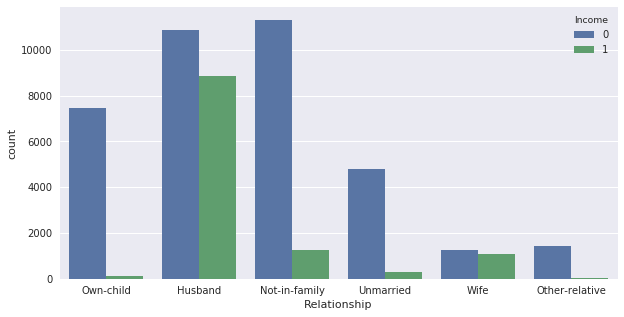

In [27]:
fig,ax = plt.subplots(1,figsize=(10,5))
sns.countplot(x='Relationship', hue='Income', data=data);

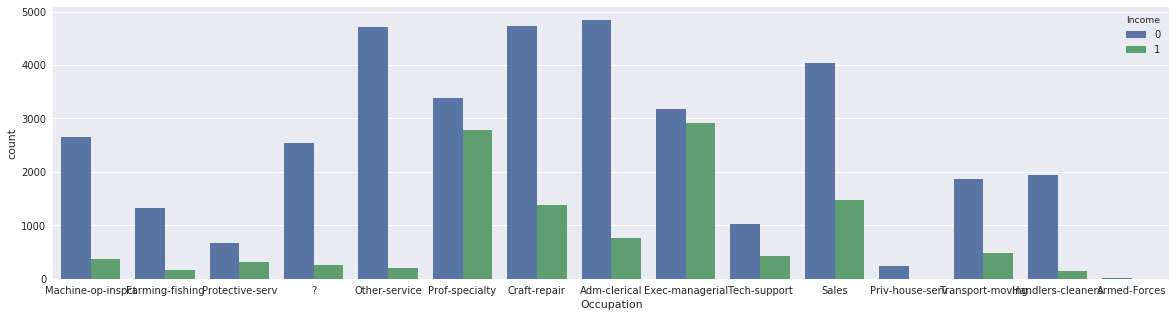

In [28]:
fig,ax = plt.subplots(1,figsize=(20,5))
sns.countplot(x='Occupation', hue='Income', data=data);

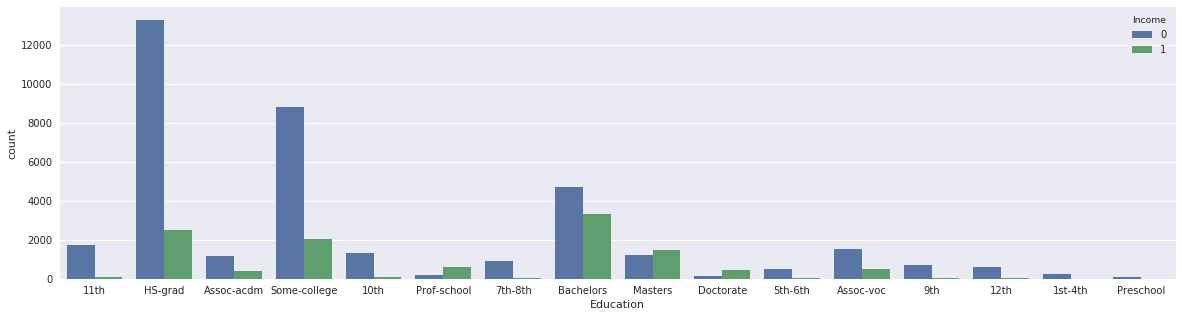

In [29]:
fig,ax = plt.subplots(1,figsize=(20,5))
sns.countplot(x='Education', hue='Income', data=data);

Numeričke vrijednosti možemo prikazati u korelacijskoj matrici. Prikazujemo koliko su korelirani određeni atributi.

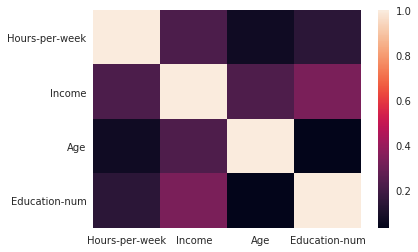

In [30]:
# Drop non-numerical variables
numerical = list(set(['Age','Education-num', 'Hours-per-week', 'Income']))

# Calculate and plot
corr_matrix = data[numerical].corr()
sns.heatmap(corr_matrix);

Bolji prikaz korelacije svih kategorija preuzet s [4] :

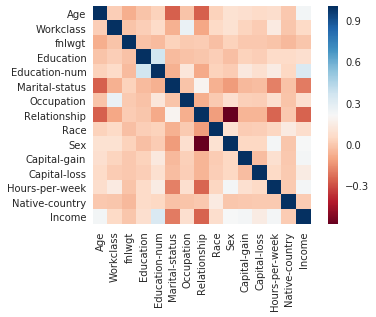

In [33]:
# Encode the categorical features as numbers
def number_encode_features(df):
    result = df.copy()
    encoders = {}
    for column in result.columns:
        if result.dtypes[column] == np.object:
            encoders[column] = preprocessing.LabelEncoder()
            result[column] = encoders[column].fit_transform(result[column])
    return result, encoders

# Calculate the correlation and plot it
encoded_data, _ = number_encode_features(data)
sns.heatmap(encoded_data.corr(), square=True, cmap='RdBu')
plt.show()

Iz korelacijske matrice zaključujemo kako većina svojstva nije korelirana, odnosno slabo je korelirana. Jaku korelaciju pronalazimo između svojstava Education i Education-num. Ta dva svojstva zapravo predstvaljaju istu stvar. Education-num je brojčana reprezentacija svojstva Education. Nadalje u analizi i rješevanju problema izbacit ćemo jedno od ta dva svojstva.

Također, postoji snažna negativna korelacija između spola i odnosa u obitelji, no to zapravo predstavlja povezanost muškarac-suprug i žena-supruga pa ta dva svojstva najvjerojatnije ostavljamo kakva jesu. Slično, postoji korelacija između dobi i bračnog stanja te dobi i odnosa u obitelji.

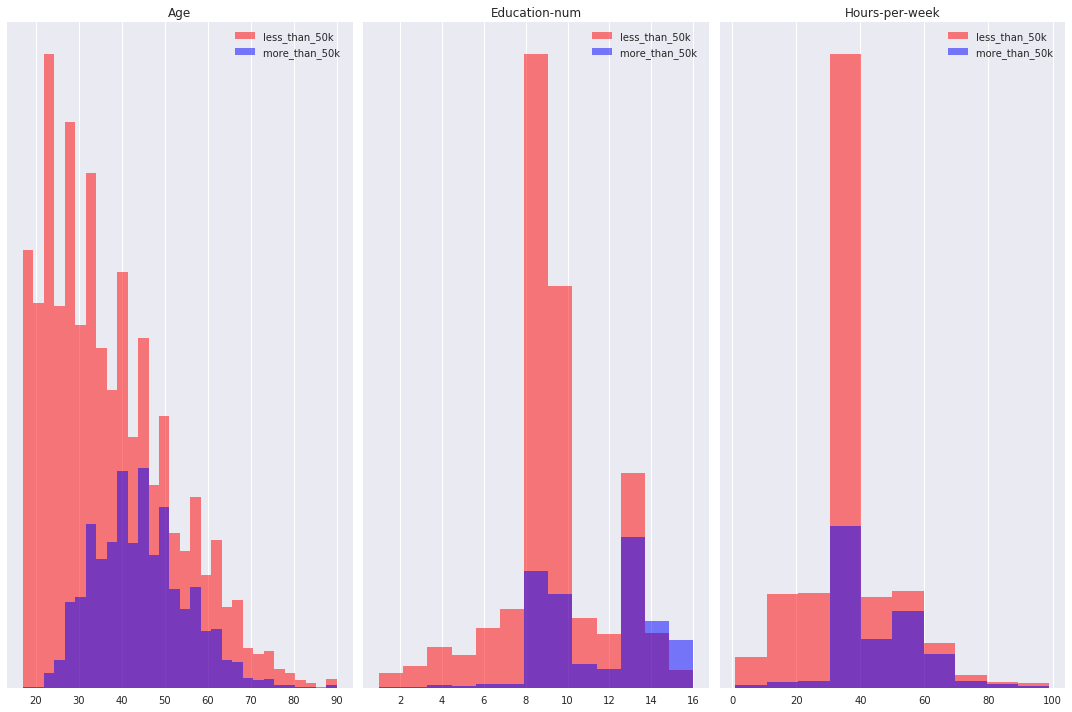

In [34]:
less_than_50k = data.loc[ data['Income'] == 0, : ]
more_than_50k = data.loc[ data['Income'] == 1, : ]

fig, ax = plt.subplots(1, 3, figsize=(15, 10))

_, bins = np.histogram(data.iloc[:,0], bins=30)
ax[0].hist(less_than_50k.iloc[:,0], bins=bins, color='r', alpha=.5, label='less_than_50k')
ax[0].hist(more_than_50k .iloc[:,0], bins=bins, color='b', alpha=.5, label='more_than_50k ')
ax[0].set_title(data.columns.values[0])
ax[0].set_yticks(()) # remove ticks on y-axis
ax[0].legend(loc='upper right')

_, bins = np.histogram(data.iloc[:,4], bins=13)
ax[1].hist(less_than_50k.iloc[:,4], bins=bins, color='r', alpha=.5, label='less_than_50k')
ax[1].hist(more_than_50k .iloc[:,4], bins=bins, color='b', alpha=.5, label='more_than_50k ')
ax[1].set_title(data.columns.values[4])
ax[1].set_yticks(()) # remove ticks on y-axis
ax[1].legend(loc='upper right')

_, bins = np.histogram(data.iloc[:,12], bins=10)
ax[2].hist(less_than_50k.iloc[:,12], bins=bins, color='r', alpha=.5, label='less_than_50k')
ax[2].hist(more_than_50k .iloc[:,12], bins=bins, color='b', alpha=.5, label='more_than_50k ')
ax[2].set_title(data.columns.values[12])
ax[2].set_yticks(()) # remove ticks on y-axis
ax[2].legend(loc='upper right')

fig.tight_layout()

Prikaz određenih kategorija obzirom na kategoriju prihoda. Kao što je već napomenuto, možemo primjetiti da je veći udio starijih, obrazovanijih osoba te onih koje rade više sati tjedno među onima koji primaju više novca godišnje. Zbog razlike u količini podataka koje pripadaju svakoj od ciljnih skupina, ne postoji jasna razlika između podataka, no možemo primjetiti da je postotak mladih ili nisko obrazovanih osoba koje imaju viša primanja relativno malen.

Prikažimo još bar plotove za svojstva 'Race', 'Education' i 'Relationship' gdje prikazujemo koliki postotak ispitanika svake kategorije pripada skupini viših, odnosno nižih prihoda.

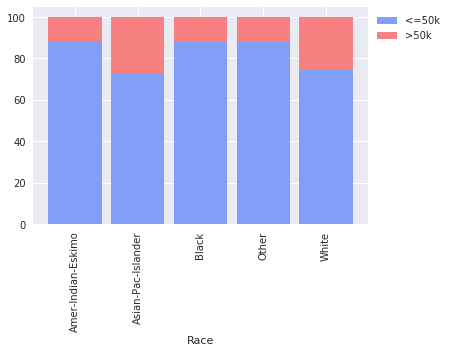

In [35]:
race_income = pd.crosstab(data['Income'], data['Race']).T
r = [0,1,2,3,4]

totals = [i+j for i,j in zip(race_income.iloc[:,0], race_income.iloc[:,1])]
more = [i / j * 100 for i,j in zip(race_income.iloc[:,0], totals)]
less = [i / j * 100 for i,j in zip(race_income.iloc[:,1], totals)]

names = race_income.index

plt.bar(r, more, color='#819FF7', width=0.85,label="<=50k")
plt.bar(r, less, bottom=more, color='#F78181', width=0.85,label=">50k")

plt.xticks(r, names,rotation="vertical")
plt.xlabel("Race")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

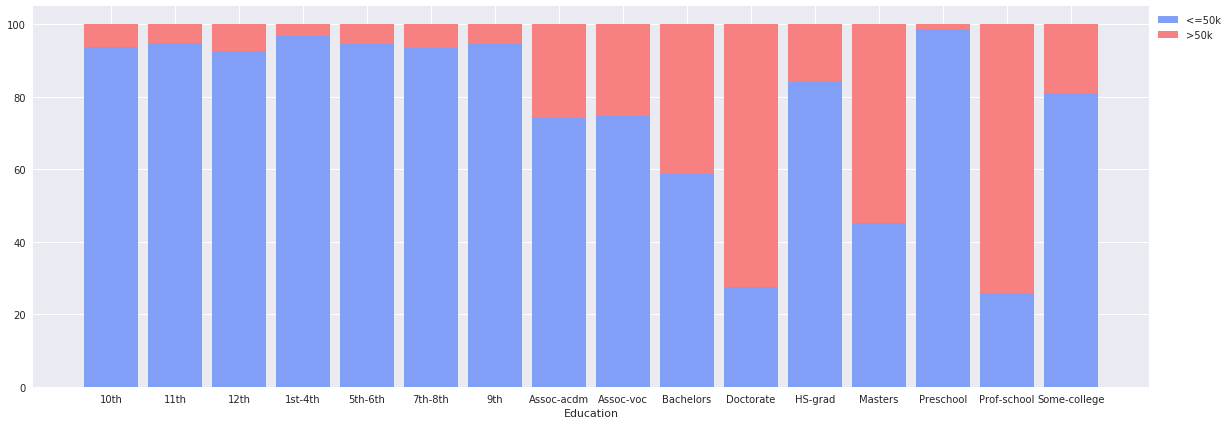

In [36]:
edu_income = pd.crosstab(data['Education'], data['Income'])
#edu_income = edu_income.sort_values(by=0)
r = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15]

totals = [i+j for i,j in zip(edu_income.iloc[:,0], edu_income.iloc[:,1])]
more = [i / j * 100 for i,j in zip(edu_income.iloc[:,0], totals)]
less = [i / j * 100 for i,j in zip(edu_income.iloc[:,1], totals)]

names = edu_income.index
fig,axes=plt.subplots(1,figsize=(20,7))

axes=plt.bar(r, more, color='#819FF7', width=0.85,label="<=50k")
axes=plt.bar(r, less, bottom=more, color='#F78181', width=0.85,label=">50k")

plt.xticks(r, names)
plt.xlabel("Education")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

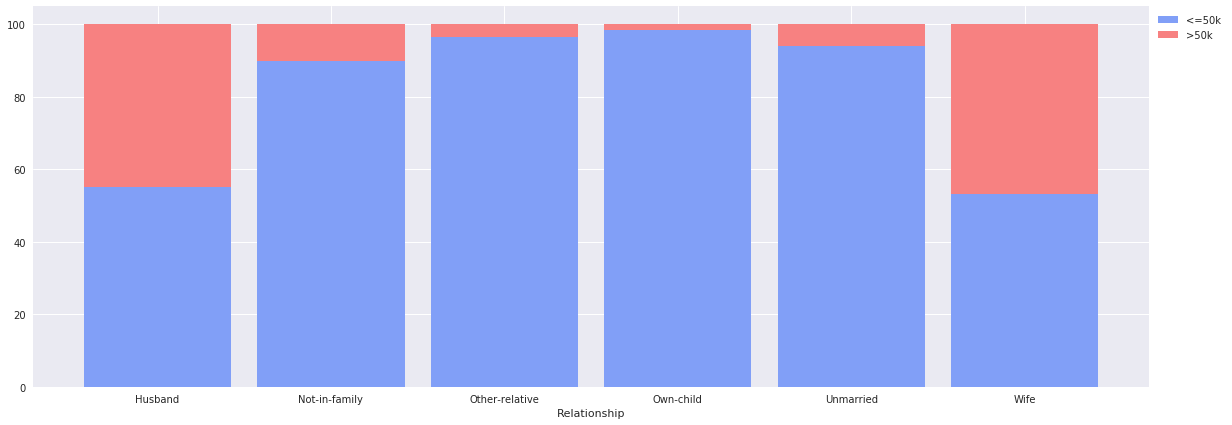

In [37]:
rel_income = pd.crosstab(data['Relationship'], data['Income'])
#edu_income = edu_income.sort_values(by=0)
r = [0,1,2,3,4,5]

totals = [i+j for i,j in zip(rel_income.iloc[:,0], rel_income.iloc[:,1])]
more = [i / j * 100 for i,j in zip(rel_income.iloc[:,0], totals)]
less = [i / j * 100 for i,j in zip(rel_income.iloc[:,1], totals)]

names = rel_income.index
fig,axes=plt.subplots(1,figsize=(20,7))

axes=plt.bar(r, more, color='#819FF7', width=0.85,label="<=50k")
axes=plt.bar(r, less, bottom=more, color='#F78181', width=0.85,label=">50k")

plt.xticks(r, names)
plt.xlabel("Relationship")
plt.legend(loc='upper left', bbox_to_anchor=(1,1), ncol=1)

## Zaključak

Nakon provedene eksploratorne analize možemo zaključiti kako će najvjerojatnije neka svojstva više utjecati na ciljno svojstvo od ostalih. Pretpostavljamo da bi to mogli biti 'Education', 'Relatinoship' i 'Age'. Također, rješili smo problem nedostajućih vrijednosti te primjetili kako ćemo neka svojstva vjerojatno maknuti iz skupa podataka jer su u korelaciji s drugima. Zbog odnosa broja instanci s pozitivnim odnosno negativnim oznakama (prima li osoba više ili manje od 50 000 dolara godišnje), za evaluaciju podataka koristit ćemo preciznost (accuracy).

## Literatura

* [1]  http://archive.ics.uci.edu/ml/datasets/adult  (Zadnje pristupljeno 17.4.2019.) Originalni dataset i opis problema
* [2]  http://robotics.stanford.edu/~ronnyk/nbtree.pdf (Zadnje pristupljeno 17.4.2019.) Rad u kojem je prvi put korišten promatrani skup podataka.

* [3]  https://medium.com/open-machine-learning-course/open-machine-learning-course-topic-2-visual-data-analysis-in-python-846b989675cd (Zadnje pristupljeno 17.4.2019.) Eksploratorna analiza u Pythonu
* [4]  https://www.valentinmihov.com/2015/04/17/adult-income-data-set/ (Zadnje pristupljeno 17.4.2019.) Eksploratorna analiza u Pythonu za Adult Dataset. Korelacijska matrica preuzeta sa stranice.